In [2]:
#setting up environment to carry out exploratory analysis on Air quality data from helsinki trams 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

**Exploratory analysis of Helsinki Air quality data**

""""Source for the data used in the analysis 

https://iot.fvh.fi/opendata/sporametri/processed_data/readme-processed_data.txt"""
    
    
    # Sporametri Air Quality data description

This directory contains data of Sporametri Air Quality sensors. Total 4 sets of measuring devices were used. Three of them were installed on trams driving on the streets of Helsinki.
One set was located on HSY MÃ¤kelÃ¤nkatu (supersite) measuring station.  The data collected from the sites moving with trams are named sporametri-movingsites-data*.
And those collected at MÃ¤kelÃ¤nkatu supersite sporametri-supersite-data*.

Data has been collected between February 2019 and August 2019. Data has been divided in files based on month of timestamp.

All data is in gzipped CSV format sporametri-movingsites-data0419.csv.gz, which looks like this sample below:

timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,comment
1554085919,2,0.0,0.0,,,,,101672.0,45.637,18.56,
1554085919,2,0.0,0.0,4.59344,-0.43572799999999995,,,101671.0,45.655,18.66,
1554085920,2,0.0,0.0,4.5344,-0.397408,,,101667.0,45.571000000000005,18.65,
1554085921,2,0.0,0.0,4.4319999999999995,-0.481392,,,101667.0,45.53,18.65,
1554085922,2,0.0,0.0,4.37784,-0.4968,,,101671.0,45.486999999999995,18.67,
1554085923,2,0.0,0.0,4.30096,-0.54952,,,101670.0,45.431000000000004,18.69,
1554085924,2,0.0,0.0,4.23808,-0.40257600000000004,,,101670.0,45.375,18.71,
1554085925,2,0.0,0.0,4.17208,-0.457136,,,101669.0,45.306999999999995,18.72,
1554085926,2,0.0,0.0,4.08016,-0.467712,,,101667.0,45.25,18.73,

The columns are:
timestamp = time in seconds (starting from '1970-01-01 00:00:00')
spora-id = specifying the tram in which the devices were installed
latitude = latitude coordinate
longitude = longitude coordinate
NO = nitric oxide
NO2 = nitrogen dioxide
O3 = ozone
CO = carbon oxide
BME680_pressure = air pressure measured using BME680 sensor
BME680_humidity = humidity measured using BME680 sensor
BME680_temperature = temperature measured using BME680 sensor
comment

In [3]:
#Read csv data
df = pd.read_csv('helstramair.csv')
#explore data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           27000 non-null  int64  
 1   spora-id            27000 non-null  int64  
 2   latitude            27000 non-null  float64
 3   longitude           27000 non-null  float64
 4   NO                  27000 non-null  float64
 5   NO2                 27000 non-null  float64
 6   O3                  27000 non-null  float64
 7   CO                  27000 non-null  float64
 8   BME680_pressure     27000 non-null  int64  
 9   BME680_humidity     27000 non-null  float64
 10  BME680_temperature  27000 non-null  float64
dtypes: float64(8), int64(3)
memory usage: 2.3 MB


From the above output we observe that the dataframe has 11 columns. We can also observe that the data type of the columns are float and integer.

In [4]:
df.describe()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
count,2.700000e+04,27000.0,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,1.550656e+09,2.0,60.179427,24.935091,0.001363,0.001363,0.000059,0.003879,99241.408148,25.977727,19.713536
std,7.907284e+03,0.0,0.014302,0.015616,0.020858,0.020858,0.002359,0.078470,280.896093,0.767613,4.153831
min,1.550637e+09,2.0,60.150661,24.901283,-0.075000,-0.075000,-0.009900,-0.648000,98770.000000,22.770000,14.460000
25%,1.550649e+09,2.0,60.168612,24.925202,-0.011000,-0.011000,-0.001000,-0.043000,98999.000000,25.670000,15.530000
50%,1.550656e+09,2.0,60.178909,24.938246,0.000000,0.000000,0.000000,0.000000,99213.000000,26.040000,19.170000
75%,1.550662e+09,2.0,60.193306,24.949089,0.011000,0.011000,0.000900,0.044000,99456.250000,26.470000,24.000000
max,1.550669e+09,2.0,60.201580,24.964325,0.290000,0.290000,0.041200,0.675000,99798.000000,27.710000,29.590000


In [5]:

#We can observe that the datframe contains 11 columns  using df.columns too
df.columns

Index(['timestamp', 'spora-id', 'latitude', 'longitude', 'NO', 'NO2', 'O3',
       'CO', 'BME680_pressure', 'BME680_humidity', 'BME680_temperature'],
      dtype='object')

In [6]:
#Let us check the dataframe statistics
df.describe()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
count,2.700000e+04,27000.0,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,1.550656e+09,2.0,60.179427,24.935091,0.001363,0.001363,0.000059,0.003879,99241.408148,25.977727,19.713536
std,7.907284e+03,0.0,0.014302,0.015616,0.020858,0.020858,0.002359,0.078470,280.896093,0.767613,4.153831
min,1.550637e+09,2.0,60.150661,24.901283,-0.075000,-0.075000,-0.009900,-0.648000,98770.000000,22.770000,14.460000
25%,1.550649e+09,2.0,60.168612,24.925202,-0.011000,-0.011000,-0.001000,-0.043000,98999.000000,25.670000,15.530000
50%,1.550656e+09,2.0,60.178909,24.938246,0.000000,0.000000,0.000000,0.000000,99213.000000,26.040000,19.170000
75%,1.550662e+09,2.0,60.193306,24.949089,0.011000,0.011000,0.000900,0.044000,99456.250000,26.470000,24.000000
max,1.550669e+09,2.0,60.201580,24.964325,0.290000,0.290000,0.041200,0.675000,99798.000000,27.710000,29.590000


In [7]:
#Let us check the top 5 rows
df.head()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
0,1550636934,2,60.162872,24.923164,0.009,0.009,0.0002,0.061,99055,23.76,29.35
1,1550636935,2,60.162838,24.923223,0.011,0.011,0.0001,0.055,99050,23.76,29.35
2,1550636936,2,60.162811,24.923281,0.011,0.011,0.0001,0.054,99048,23.75,29.35
3,1550636937,2,60.162781,24.923323,0.011,0.011,0.0000,0.053,99048,23.77,29.36
4,1550636938,2,60.162750,24.923347,0.011,0.011,0.0000,0.034,99058,23.75,29.35


In [8]:
#Let us check the last five rows of the dataframe
df.tail()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
26995,1550669089,2,60.200298,24.945017,-0.003,-0.003,0.0003,-0.062,99751,24.38,14.46
26996,1550669090,2,60.200264,24.945045,-0.003,-0.003,0.0003,-0.062,99753,24.38,14.46
26997,1550669091,2,60.200237,24.945070,-0.003,-0.003,0.0002,-0.028,99751,24.41,14.47
26998,1550669092,2,60.200211,24.945093,-0.003,-0.003,0.0001,-0.024,99752,24.39,14.46
26999,1550669093,2,60.200188,24.945112,-0.001,-0.001,0.0000,-0.020,99753,24.40,14.46


Let us now check if there is any null or missing data and make corrections if there is any

In [10]:
#cLet us check if there is any missing data
missing_data = df.isnull().any()
missing_data

timestamp             False
spora-id              False
latitude              False
longitude             False
NO                    False
NO2                   False
O3                    False
CO                    False
BME680_pressure       False
BME680_humidity       False
BME680_temperature    False
dtype: bool

From the above output we observe that there are not missing data

In [13]:
df['spora-id'].unique() # checking which tram id we have 

array([2])

In [14]:
df['spora-id'] #The result reveal that the spora-id represented in our data is only tram with id 2

0        2
1        2
2        2
3        2
4        2
        ..
26995    2
26996    2
26997    2
26998    2
26999    2
Name: spora-id, Length: 27000, dtype: int64

In [15]:
df.head()

,timestamp,spora-id,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
0,1550636934,2,60.162872,24.923164,0.009,0.009,0.0002,0.061,99055,23.76,29.35
1,1550636935,2,60.162838,24.923223,0.011,0.011,0.0001,0.055,99050,23.76,29.35
2,1550636936,2,60.162811,24.923281,0.011,0.011,0.0001,0.054,99048,23.75,29.35
3,1550636937,2,60.162781,24.923323,0.011,0.011,0.0000,0.053,99048,23.77,29.36
4,1550636938,2,60.162750,24.923347,0.011,0.011,0.0000,0.034,99058,23.75,29.35


In [16]:
#Since we know that the data we collected is all from tram id (spora_id),2 we can simply drop the column
df = df.drop('spora-id',axis=1)
df

,timestamp,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
0,1550636934,60.162872,24.923164,0.009,0.009,0.0002,0.061,99055,23.76,29.35
1,1550636935,60.162838,24.923223,0.011,0.011,0.0001,0.055,99050,23.76,29.35
2,1550636936,60.162811,24.923281,0.011,0.011,0.0001,0.054,99048,23.75,29.35
3,1550636937,60.162781,24.923323,0.011,0.011,0.0000,0.053,99048,23.77,29.36
4,1550636938,60.162750,24.923347,0.011,0.011,0.0000,0.034,99058,23.75,29.35
...,...,...,...,...,...,...,...,...,...,...
26995,1550669089,60.200298,24.945017,-0.003,-0.003,0.0003,-0.062,99751,24.38,14.46
26996,1550669090,60.200264,24.945045,-0.003,-0.003,0.0003,-0.062,99753,24.38,14.46
26997,1550669091,60.200237,24.945070,-0.003,-0.003,0.0002,-0.028,99751,24.41,14.47
26998,1550669092,60.200211,24.945093,-0.003,-0.003,0.0001,-0.024,99752,24.39,14.46


**We now have ten columns. We  can also observe that data among the columns need to be normalized. This is because they are all in different ranges. 
Once, we normalized the data we can check if there are any types of correlations among the different features using pairplot function from seaborn.**

In [17]:
#Normalize data to change values of numeric columns in the dataset to a common scale, without distoritng differences in the range values
df = (df - np.min(df)) / (np.max(df) - np.min(df)).values
df

/Users/wbehutiy/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wbehutiy/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/wbehutiy/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,timestamp,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature
0,0.000000,0.239812,0.347086,0.230137,0.230137,0.197652,0.535903,0.277237,0.200405,0.984137
1,0.000031,0.239145,0.348022,0.235616,0.235616,0.195695,0.531368,0.272374,0.200405,0.984137
2,0.000062,0.238614,0.348942,0.235616,0.235616,0.195695,0.530612,0.270428,0.198381,0.984137
3,0.000093,0.238025,0.349608,0.235616,0.235616,0.193738,0.529856,0.270428,0.202429,0.984798
4,0.000124,0.237416,0.349989,0.235616,0.235616,0.193738,0.515495,0.280156,0.198381,0.984137
...,...,...,...,...,...,...,...,...,...,...
26995,0.999876,0.974823,0.693728,0.197260,0.197260,0.199609,0.442933,0.954280,0.325911,0.000000
26996,0.999907,0.974155,0.694172,0.197260,0.197260,0.199609,0.442933,0.956226,0.325911,0.000000
26997,0.999938,0.973625,0.694569,0.197260,0.197260,0.197652,0.468632,0.954280,0.331984,0.000661
26998,0.999969,0.973114,0.694934,0.197260,0.197260,0.195695,0.471655,0.955253,0.327935,0.000000


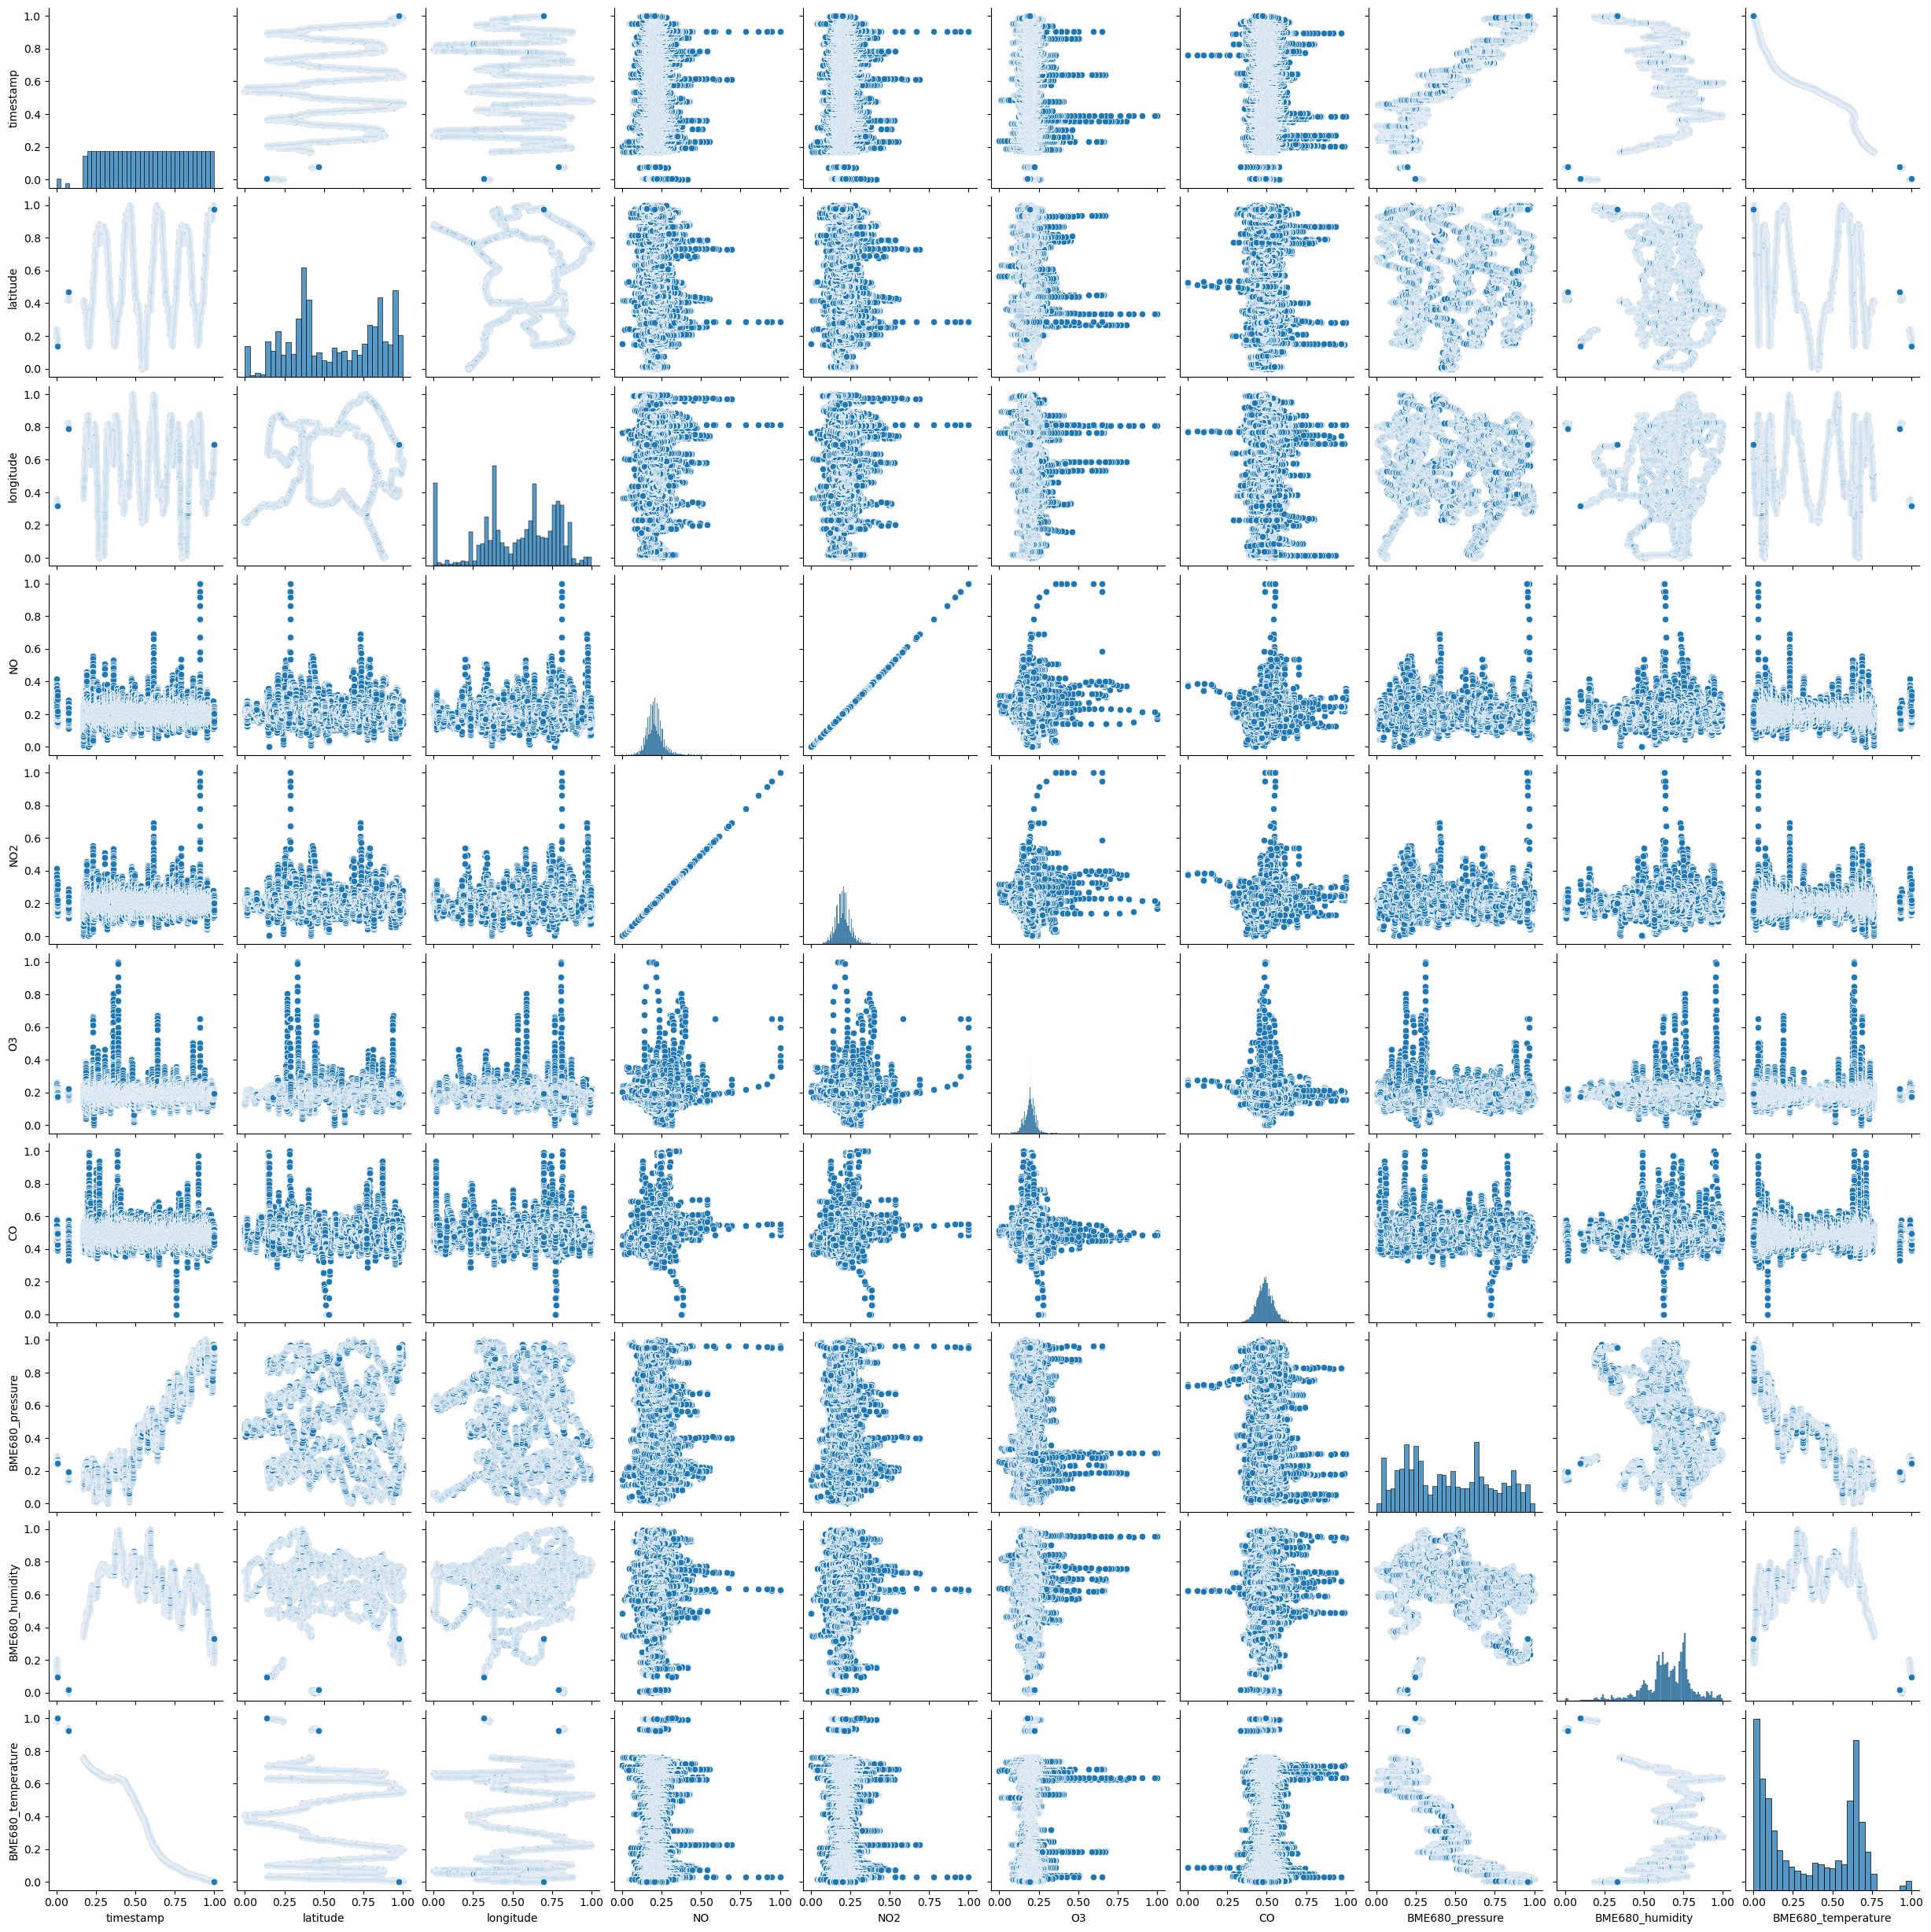

In [18]:
 #Now use pairplot function to check if there arenow use pairplot function to check if there are
sns.pairplot(df)

From the above plot, we can observe linear correlation between NO and NO2 emissions. 
We can also see that some specific geolocations (lattitude and longtiude) have highest NO,NO2 and CO emissions.

<Axes: >

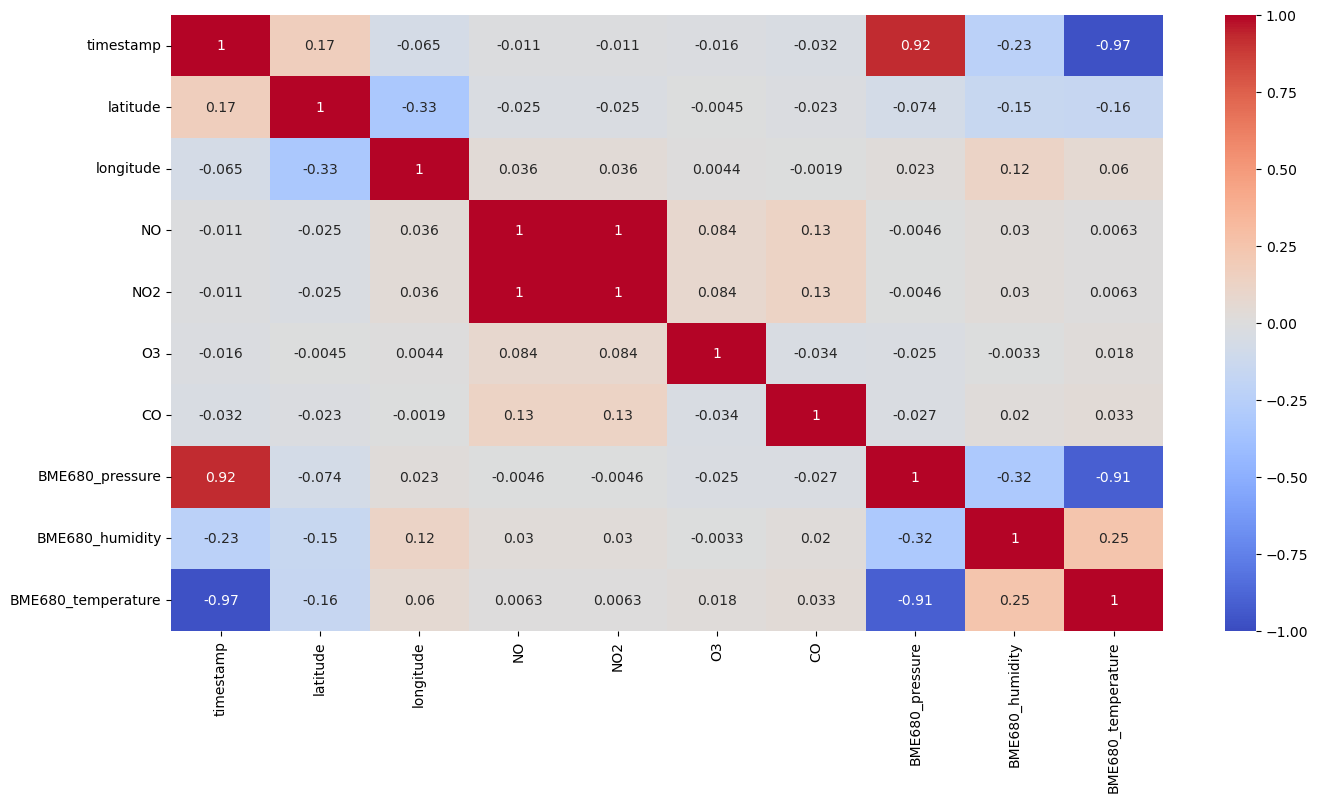

In [21]:
#Let us again check the correlation using correlation matrix function and ploting a heatmap
plt.figure(figsize= (16,8))
mycorlMatrix = df.corr() 

#Let us plot the correlation coefficient for all column pairs
sns.heatmap(mycorlMatrix,vmin=-1, vmax=1, annot=True,cmap= 'coolwarm')

**In the above heatmap output, we observe that there is a positive coorelation between time stamp and bme680_pressure.
BMe680_temperature has negative correlation with time stamp. 
We also observe linear coorelation between NO and NO2.**

**K-means clustering to explore groupings
Let us now use k_means clustering to cluster the data and observe if there are any groupings**

In [30]:
X = df
mykmeans = KMeans(n_clusters= 5, random_state=0) # let's assume k value of 6
df["cluster"] = mykmeans.fit_predict(X) 
df["cluster"]= df["cluster"].astype("category")
df.tail()

/Users/wbehutiy/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,timestamp,latitude,longitude,NO,NO2,O3,CO,BME680_pressure,BME680_humidity,BME680_temperature,cluster
26995,0.999876,0.974823,0.693728,0.19726,0.19726,0.199609,0.442933,0.954280,0.325911,0.000000,1
26996,0.999907,0.974155,0.694172,0.19726,0.19726,0.199609,0.442933,0.956226,0.325911,0.000000,1
26997,0.999938,0.973625,0.694569,0.19726,0.19726,0.197652,0.468632,0.954280,0.331984,0.000661,1
26998,0.999969,0.973114,0.694934,0.19726,0.19726,0.195695,0.471655,0.955253,0.327935,0.000000,1
26999,1.000000,0.972662,0.695235,0.20274,0.20274,0.193738,0.474679,0.956226,0.329960,0.000000,1


Let us now plot these clusters using seaborn

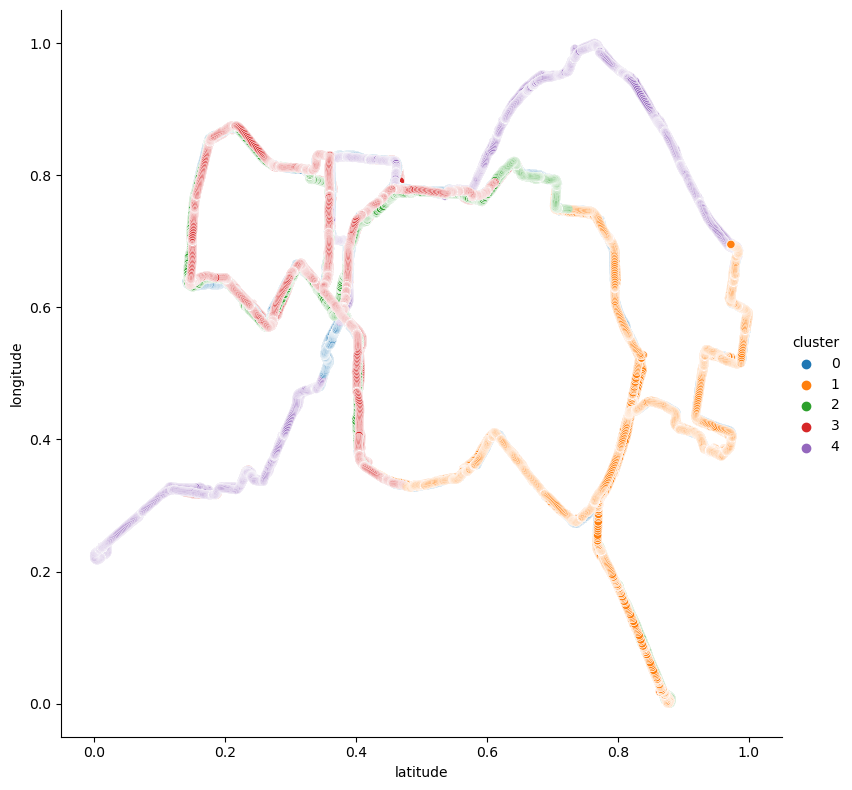

In [31]:
sns.relplot(x= "latitude", y="longitude", hue= "cluster", data = df, height= 8) # exploring categories by considering location related data, latitude and longitude

The cluster distribution above gives some hint on the  five clusters